In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv("dataset_classification.csv")

# Display the first few rows and information about the columns
print("Data Head:")
print(df.head())

Data Head:
   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   1.587398  -0.740530  -1.197426  -1.441719  -0.064317   0.081751   
1   5.092641  -0.916477  -5.538151  -4.476479   6.046994   0.798887   
2   1.901490   0.704298  -2.932813  -1.121583  -2.017507  -0.312899   
3   0.227252  -3.311746  -0.685543  10.491911   1.413361  -0.803587   
4  -2.505285   1.599216  -0.280711   4.327519   1.446468   0.316733   

   feature_7  feature_8  feature_9  feature_10  feature_11  feature_12  \
0  -4.070187   0.852081   2.961815   -1.463363    0.883017   -0.594521   
1   2.504787   1.981433   9.397956  -20.670213   -0.656893   -2.859605   
2  -0.546077  -1.761534   5.284995    2.844848   -1.482650    5.558095   
3   2.795254   0.121080  -0.546776   -0.855643   -1.254734   -2.594928   
4   0.973359   1.366973   2.947062    8.236126   -1.377552    2.497554   

   feature_13  feature_14  feature_15  feature_16  feature_17  feature_18  \
0    1.664375    0.219645    2.629602   

In [12]:
# Check unique labels and their counts to inform the choice of classification type
print("Unique labels and their counts:")
print(df['label'].value_counts())

Unique labels and their counts:
label
2    2412
0    2403
3    2398
4    2394
1    2393
Name: count, dtype: int64


First 5 rows of the dataset:
   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   1.587398  -0.740530  -1.197426  -1.441719  -0.064317   0.081751   
1   5.092641  -0.916477  -5.538151  -4.476479   6.046994   0.798887   
2   1.901490   0.704298  -2.932813  -1.121583  -2.017507  -0.312899   
3   0.227252  -3.311746  -0.685543  10.491911   1.413361  -0.803587   
4  -2.505285   1.599216  -0.280711   4.327519   1.446468   0.316733   

   feature_7  feature_8  feature_9  feature_10  feature_11  feature_12  \
0  -4.070187   0.852081   2.961815   -1.463363    0.883017   -0.594521   
1   2.504787   1.981433   9.397956  -20.670213   -0.656893   -2.859605   
2  -0.546077  -1.761534   5.284995    2.844848   -1.482650    5.558095   
3   2.795254   0.121080  -0.546776   -0.855643   -1.254734   -2.594928   
4   0.973359   1.366973   2.947062    8.236126   -1.377552    2.497554   

   feature_13  feature_14  feature_15  feature_16  feature_17  feature_18  \
0    1.664375    0.219

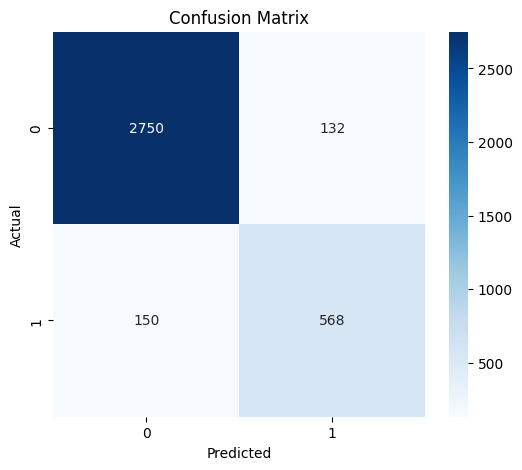

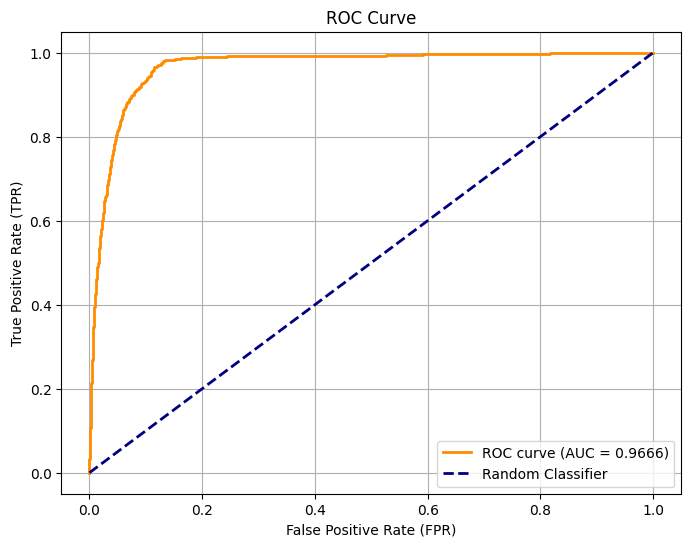

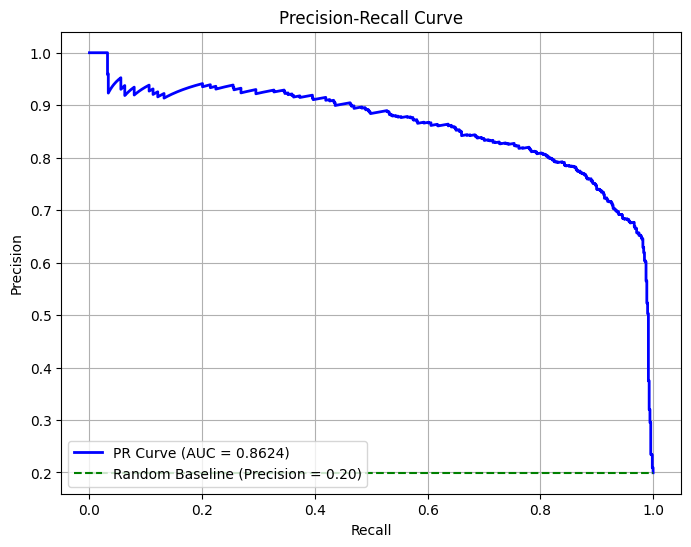

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef,
    roc_curve, auc, precision_recall_curve, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

# ===========================
# 1. Load Dataset
# ===========================
df = pd.read_csv("dataset_classification.csv")
print("First 5 rows of the dataset:")
print(df.head())

# ===========================
# 2. Binary Classification Setup
# ===========================
# Transform the original target 'label' into a binary problem:
# Class 1 vs All others
df['binary_label'] = (df['label'] == 1).astype(int)
X = df.drop(['label', 'binary_label'], axis=1)
y = df['binary_label']

# ===========================
# 3. Split Dataset
# ===========================
# Stratify ensures class balance in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ===========================
# 4. Train Logistic Regression
# ===========================
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# ===========================
# 5. Predictions
# ===========================
y_pred = model.predict(X_test)          # Class predictions
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# ===========================
# 6. Evaluation Metrics
# ===========================
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_roc = auc(fpr, tpr)

precisions_prc, recalls_prc, _ = precision_recall_curve(y_test, y_proba)
auc_prc = auc(recalls_prc, precisions_prc)

print("\n" + "="*50)
print("CLASSIFICATION METRICS")
print("="*50)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"MCC: {mcc:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print(f"AUC-PRC: {auc_prc:.4f}")

# ===========================
# 7. Confusion Matrix Visualization
# ===========================
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 8. ROC Curve Visualization

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_roc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# 9. Precision-Recall Curve Visualization

plt.figure(figsize=(8, 6))
plt.plot(recalls_prc, precisions_prc, color='blue', lw=2, label=f'PR Curve (AUC = {auc_prc:.4f})')
baseline = y_test.sum() / len(y_test)
plt.plot([0, 1], [baseline, baseline], color='green', linestyle='--',
         label=f'Random Baseline (Precision = {baseline:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


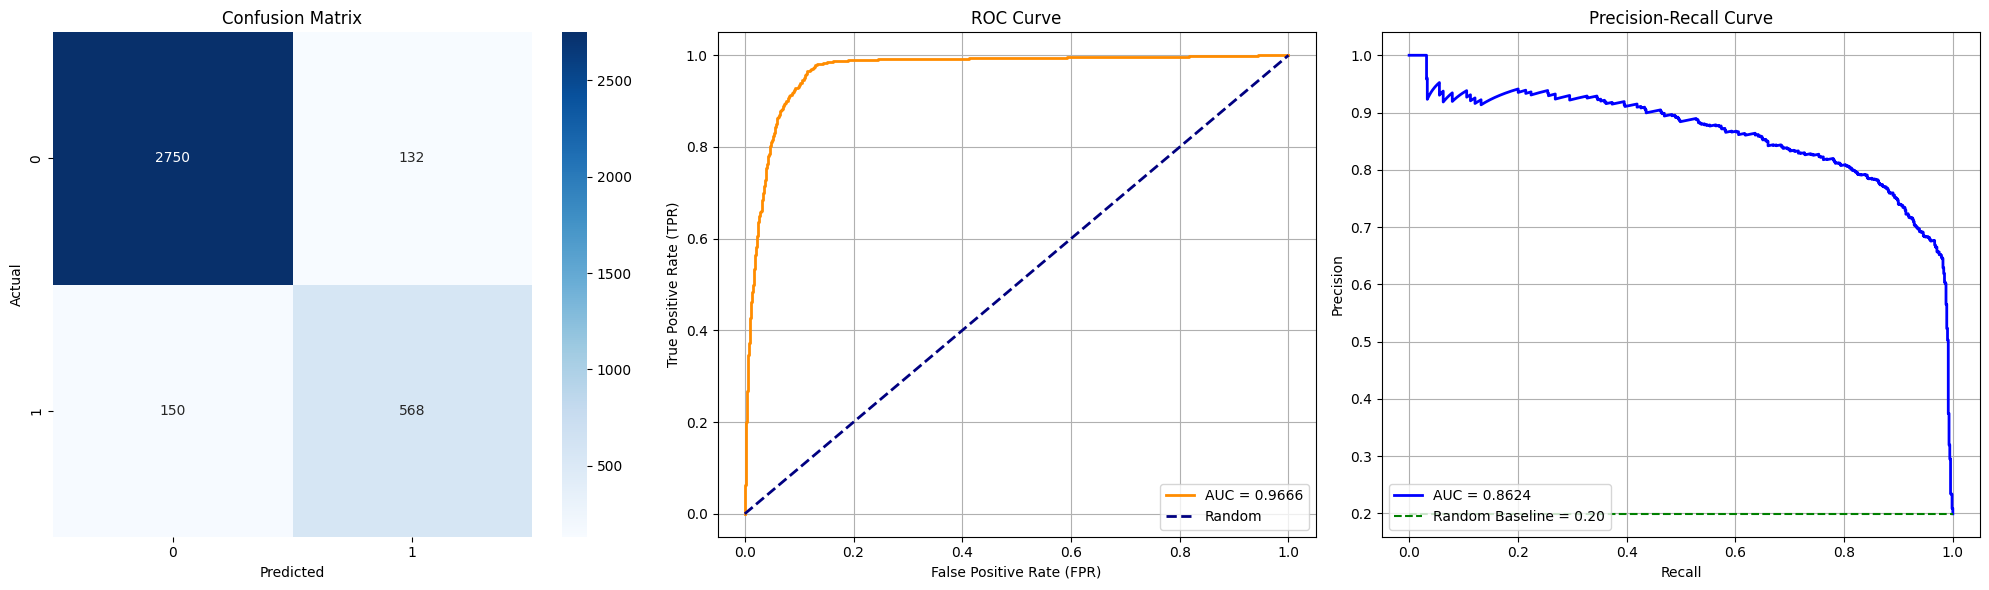

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)

# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_roc = auc(fpr, tpr)

# --- Precision-Recall Curve ---
precisions_prc, recalls_prc, _ = precision_recall_curve(y_test, y_proba)
auc_prc = auc(recalls_prc, precisions_prc)
baseline = y_test.sum() / len(y_test)

# =========================
# Combined Figure
# =========================
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix')

# 2. ROC Curve
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_roc:.4f}')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
axes[1].set_xlabel('False Positive Rate (FPR)')
axes[1].set_ylabel('True Positive Rate (TPR)')
axes[1].set_title('ROC Curve')
axes[1].legend(loc="lower right")
axes[1].grid(True)

# 3. Precision-Recall Curve
axes[2].plot(recalls_prc, precisions_prc, color='blue', lw=2, label=f'AUC = {auc_prc:.4f}')
axes[2].plot([0, 1], [baseline, baseline], color='green', linestyle='--',
             label=f'Random Baseline = {baseline:.2f}')
axes[2].set_xlabel('Recall')
axes[2].set_ylabel('Precision')
axes[2].set_title('Precision-Recall Curve')
axes[2].legend(loc="lower left")
axes[2].grid(True)

plt.tight_layout()
plt.show()
